In [1]:
import numpy as np
import pandas as pd
import lifelines as ll
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib.pyplot import NullFormatter
from lifelines.statistics import logrank_test
from sklearn.model_selection import train_test_split as tts
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
from IPython.display import HTML

In [2]:
# Importing the 11-year dataset
dataset = pd.read_csv('11.csv')
dataset_new = dataset.drop(["indalg", "smok100", "agesmk", "smokstat", "smokhome", "curruse", "everuse"], axis=1)
dataset_newna = dataset_new.dropna()
dataset_newna.sample(5)

,record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,ssnyn,vt,histatus,hitype,povpct,stater,rcow,tenure,citizen,health
1429981,1498474,25,2.0,1,4.0,3.0,6.0,8.0,905,248,...,1,1.0,0.0,0.0,7,71,1.0,2.0,1.0,2.0
1549143,1617050,73,1.0,2,2.0,3.0,4.0,5.0,939,182,...,1,0.0,1.0,1.0,7,31,1.0,1.0,1.0,3.0
1636537,1704824,51,4.0,1,3.0,3.0,8.0,11.0,906,125,...,0,0.0,1.0,4.0,15,93,1.0,2.0,1.0,2.0
1517516,1585784,46,1.0,1,1.0,3.0,10.0,6.0,913,216,...,1,0.0,0.0,0.0,16,58,3.0,2.0,1.0,3.0
1466740,1534778,71,1.0,1,1.0,3.0,11.0,4.0,933,60,...,1,1.0,1.0,1.0,18,12,1.0,1.0,1.0,5.0


In [3]:
# Splitting data set to have smaller subset of data for visualizing
dataset_subset = dataset_new.sample(20000)

In [4]:
# Creating Duration array and Outcome array to fit the model
D = dataset["follow"]
O = dataset["inddea"]

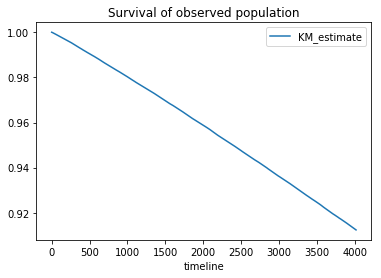

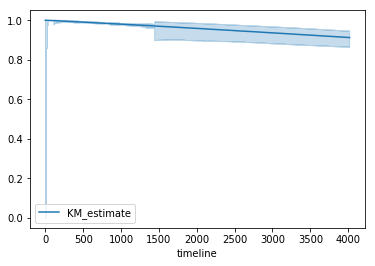

In [5]:
# Creating KMF model
kmf = KaplanMeierFitter()
kmf.fit(D, event_observed=O)
kmf.survival_function_.plot()
plt.title('Survival of observed population')
kmf.plot()

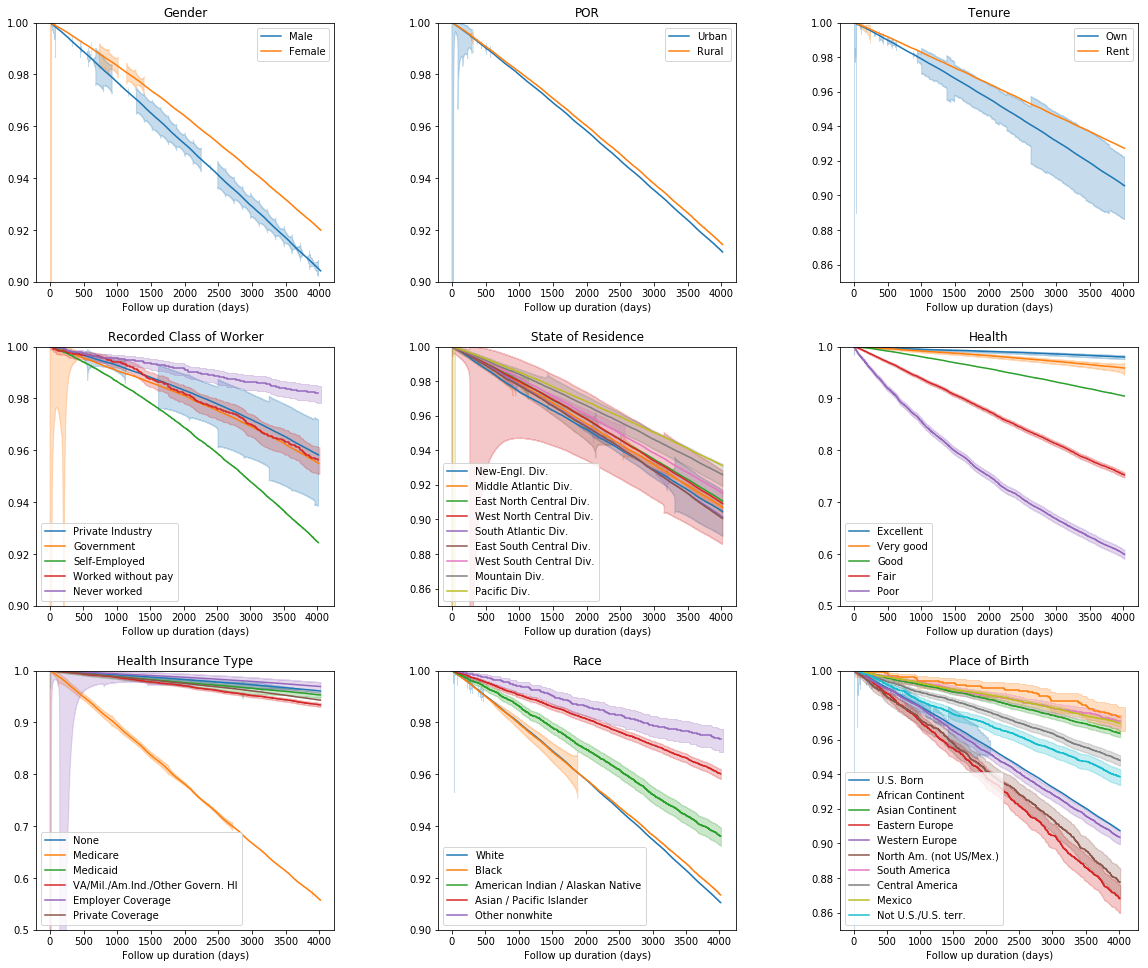

In [7]:
# Arranging all plots together to facilitate visual comparison
# Plotting survival probability by Gender
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(331)
sex = (dataset["sex"] == 1)
kmf.fit(D[sex], event_observed=O[sex], label="Male")
kmf.plot(ax=ax, ci_force_lines=False)
kmf.fit(D[~sex], event_observed=O[~sex], label="Female")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("Gender")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Urban vs Rural POR
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(332)
POR = (dataset["urban"] == 1)
kmf.fit(D[POR], event_observed=O[POR], label="Urban")
kmf.plot(ax=ax, ci_force_lines=False)
kmf.fit(D[~POR], event_observed=O[~POR], label="Rural")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("POR")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Tenure
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(333)
ten = (dataset["tenure"] == 1)
kmf.fit(D[ten], event_observed=O[ten], label="Own")
kmf.plot(ax=ax, ci_force_lines=False)
kmf.fit(D[~ten], event_observed=O[~ten], label="Rent")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1);
plt.title("Tenure")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by RCOW
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(334)
rcow = (dataset["rcow"] == 1)
kmf.fit(D[rcow], event_observed=O[rcow], label="Private Industry")
kmf.plot(ax=ax, ci_force_lines=False)
rcow2 = (dataset["rcow"] == 2)
kmf.fit(D[rcow2], event_observed=O[rcow2], label="Government")
kmf.plot(ax=ax, ci_force_lines=False)
rcow3 = (dataset["rcow"] == 3)
kmf.fit(D[rcow3], event_observed=O[rcow3], label="Self-Employed")
kmf.plot(ax=ax, ci_force_lines=False)
rcow4 = (dataset["rcow"] == 4)
kmf.fit(D[rcow4], event_observed=O[rcow4], label="Worked without pay")
kmf.plot(ax=ax, ci_force_lines=False)
rcow5 = (dataset["rcow"] == 5)
kmf.fit(D[rcow5], event_observed=O[rcow5], label="Never worked")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("Recorded Class of Worker")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by StateR
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(335)
ned=[11,12,13,14,15,16]
mad=[21,22,23]
encd=[31,32,33,34,35]
wncd=[41,42,43,44,45,46,47]
sad=[51,52,53,54,55,56,57,58,59]
escd=[61,62,63,64]
wscd=[71,72,73,74]
md=[81,82,83,84,85,86,87,88]
pd=[91,92,93,94,95]
state1 = (dataset["stater"].isin (ned))
kmf.fit(D[state1], event_observed=O[state1], label="New-Engl. Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state2 = (dataset["stater"].isin (mad))
kmf.fit(D[state2], event_observed=O[state2], label="Middle Atlantic Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state3 = (dataset["stater"].isin (encd))
kmf.fit(D[state3], event_observed=O[state3], label="East North Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state4 = (dataset["stater"].isin (wncd))
kmf.fit(D[state4], event_observed=O[state4], label="West North Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state5 = (dataset["stater"].isin (sad))
kmf.fit(D[state5], event_observed=O[state5], label="South Atlantic Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state6 = (dataset["stater"].isin (escd))
kmf.fit(D[state6], event_observed=O[state6], label="East South Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state7 = (dataset["stater"].isin (wscd))
kmf.fit(D[state7], event_observed=O[state7], label="West South Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state8 = (dataset["stater"].isin (md))
kmf.fit(D[state8], event_observed=O[state8], label="Mountain Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state9 = (dataset["stater"].isin (pd))
kmf.fit(D[state9], event_observed=O[state9], label="Pacific Div.")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1);
plt.title("State of Residence")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Health
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(336)
health1 = (dataset["health"]==1)
kmf.fit(D[health1], event_observed=O[health1], label="Excellent")
kmf.plot(ax=ax, ci_force_lines=False)
health2 = (dataset["health"]==2)
kmf.fit(D[health2], event_observed=O[health2], label="Very good")
kmf.plot(ax=ax, ci_force_lines=False)
health3 = (dataset["health"]==3)
kmf.fit(D[health3], event_observed=O[health3], label="Good")
kmf.plot(ax=ax, ci_force_lines=False)
health4 = (dataset["health"]==4)
kmf.fit(D[health4], event_observed=O[health4], label="Fair")
kmf.plot(ax=ax, ci_force_lines=False)
health5 = (dataset["health"]==5)
kmf.fit(D[health5], event_observed=O[health5], label="Poor")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.5, 1);
plt.title("Health")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Health Insurance Type
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(337)
hitype = (dataset["hitype"]==0)
kmf.fit(D[hitype], event_observed=O[hitype], label="None")
kmf.plot(ax=ax, ci_force_lines=False)
hitype1 = (dataset["hitype"]==1)
kmf.fit(D[hitype1], event_observed=O[hitype1], label="Medicare")
kmf.plot(ax=ax, ci_force_lines=False)
hitype2 = (dataset["hitype"]==2)
kmf.fit(D[hitype2], event_observed=O[hitype2], label="Medicaid")
kmf.plot(ax=ax, ci_force_lines=False)
hitype3 = (dataset["hitype"]==3)
kmf.fit(D[hitype3], event_observed=O[hitype3], label="VA/Mil./Am.Ind./Other Govern. HI")
kmf.plot(ax=ax, ci_force_lines=False)
hitype4 = (dataset["hitype"]==4)
kmf.fit(D[hitype4], event_observed=O[hitype4], label="Employer Coverage")
kmf.plot(ax=ax, ci_force_lines=False)
hitype5 = (dataset["hitype"]==5)
kmf.fit(D[hitype5], event_observed=O[hitype5], label="Private Coverage")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.5, 1);
plt.title("Health Insurance Type")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Race
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(338)
race1 = (dataset["race"]==1)
kmf.fit(D[race1], event_observed=O[race1], label="White")
kmf.plot(ax=ax, ci_force_lines=False)
race2 = (dataset["race"]==2)
kmf.fit(D[race2], event_observed=O[race2], label="Black")
kmf.plot(ax=ax, ci_force_lines=False)
race3 = (dataset["race"]==3)
kmf.fit(D[race3], event_observed=O[race3], label="American Indian / Alaskan Native")
kmf.plot(ax=ax, ci_force_lines=False)
race4 = (dataset["race"]==4)
kmf.fit(D[race4], event_observed=O[race4], label="Asian / Pacific Islander")
kmf.plot(ax=ax, ci_force_lines=False)
race5 = (dataset["race"]==5)
kmf.fit(D[race5], event_observed=O[race5], label="Other nonwhite")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1)
plt.title("Race")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by POB
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(339)
us=[901,902,904,905, 906, 908, 909,910,911,912,913,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,944,945,946,947,948,949,950,951,953,954,955,956,957,958, 959,960]
pob1 = (dataset["pob"].isin(us))
kmf.fit(D[pob1], event_observed=O[pob1], label="U.S. Born")
kmf.plot(ax=ax, ci_force_lines=False)
pob2 = (dataset["pob"]==101)
kmf.fit(D[pob2], event_observed=O[pob2], label="African Continent")
kmf.plot(ax=ax, ci_force_lines=False)
pob3 = (dataset["pob"]==102)
kmf.fit(D[pob3], event_observed=O[pob3], label="Asian Continent")
kmf.plot(ax=ax, ci_force_lines=False)
pob4 = (dataset["pob"]==103)
kmf.fit(D[pob4], event_observed=O[pob4], label="Eastern Europe")
kmf.plot(ax=ax, ci_force_lines=False)
pob5 = (dataset["pob"]==104)
kmf.fit(D[pob5], event_observed=O[pob5], label="Western Europe")
kmf.plot(ax=ax, ci_force_lines=False)
pob6 = (dataset["pob"]==105)
kmf.fit(D[pob6], event_observed=O[pob6], label="North Am. (not US/Mex.)")
kmf.plot(ax=ax, ci_force_lines=False)
pob7 = (dataset["pob"]==106)
kmf.fit(D[pob7], event_observed=O[pob7], label="South America")
kmf.plot(ax=ax, ci_force_lines=False)
pob8 = (dataset["pob"]==107)
kmf.fit(D[pob8], event_observed=O[pob8], label="Central America")
kmf.plot(ax=ax, ci_force_lines=False)
pob9 = (dataset["pob"]==108)
kmf.fit(D[pob9], event_observed=O[pob9], label="Mexico")
kmf.plot(ax=ax, ci_force_lines=False)
pob10 = (dataset["pob"]==111)
kmf.fit(D[pob10], event_observed=O[pob10], label="Not U.S./U.S. terr.")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1)
plt.title("Place of Birth")
plt.xlabel("Follow up duration (days)")

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

In [19]:
# Doing the same in plotly for 11 dataset
# Plotting survival probability by Gender
fig = plt.gcf()
#fig.set_size_inches(18,15)
ax = plt.subplot(331)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sex = (dataset["sex"] == 1)
kmf.fit(D[sex], event_observed=O[sex], label="Male")
kmf.plot(ax=ax, ci_force_lines=True, legend=False)
kmf.fit(D[~sex], event_observed=O[~sex], label="Female")
p = kmf.plot(ax=ax, ci_force_lines=True, legend=False)
plt.ylim(0.5, 1);
#plt.title("Gender")
plt.xlabel("Follow up duration (days)")

tls.set_credentials_file(username='yg7891', api_key='cjs1S61VN1STTLYXnhz7')
a = plt.gcf()

def pyplot(a, ci=True, legend=True, filename='Gender_Interactive'):
    # Convert mpl fig obj to plotly fig obj, resize to plotly's default
    py_fig = tls.mpl_to_plotly(a, resize=True)
   
    if legend == True:
        # Add legend, place it at the top right corner of the plot
        py_fig['layout'].update(
            showlegend=True,
            title='Gender',
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'),
            width=900,
            height=600,
            legend=layout.Legend(
                x=1.05,
                y=1
            )
        )
        
    # Send updated figure object to Plotly, show result in notebook
    return py.iplot(py_fig, filename=filename)

pyplot(a)

In [18]:
# Doing the same in pyplot for 11 dataset
# Plotting survival probability by Health Insurance Type
fig = plt.gcf()
#fig.set_size_inches(18,15)
ax = plt.subplot(337)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
hitype = (dataset["hitype"]==0)
kmf.fit(D[hitype], event_observed=O[hitype], label="None")
kmf.plot(ax=ax, ci_force_lines=True, legend=False)
hitype1 = (dataset["hitype"]==1)
kmf.fit(D[hitype1], event_observed=O[hitype1], label="Medicare")
kmf.plot(ax=ax, ci_force_lines=True, legend=False)
hitype2 = (dataset["hitype"]==2)
kmf.fit(D[hitype2], event_observed=O[hitype2], label="Medicaid")
kmf.plot(ax=ax, ci_force_lines=True, legend=False)
hitype3 = (dataset["hitype"]==3)
kmf.fit(D[hitype3], event_observed=O[hitype3], label="VA/Mil./Am.Ind./Other Govern. HI")
kmf.plot(ax=ax, ci_force_lines=True, legend=False)
hitype4 = (dataset["hitype"]==4)
kmf.fit(D[hitype4], event_observed=O[hitype4], label="Employer Coverage")
kmf.plot(ax=ax, ci_force_lines=True, legend=False)
hitype5 = (dataset["hitype"]==5)
kmf.fit(D[hitype5], event_observed=O[hitype5], label="Private Coverage")
kmf.plot(ax=ax, ci_force_lines=True, legend=False)
plt.ylim(0.5, 1);
#plt.title("Health Insurance Type")
plt.xlabel("Follow up duration (days)")

tls.set_credentials_file(username='yg7891', api_key='cjs1S61VN1STTLYXnhz7')
b = plt.gcf()

def pyplot(b, ci=False, legend=True, filename='HealthInsurance_Interactive'):
    # Convert mpl fig obj to plotly fig obj, resize to plotly's default
    py_fig = tls.mpl_to_plotly(b, resize=True)
   
    if legend == True:
        # Add legend, place it at the top right corner of the plot
        py_fig['layout'].update(
            showlegend=True,
            title='Health Insurance',
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'),
            width=900,
            height=600,
            legend=layout.Legend(
                x=1.01,
                y=1
            )
        )
        
    # Send updated figure object to Plotly, show result in notebook
    return py.iplot(py_fig, filename=filename)

pyplot(b)

The draw time for this plot will be slow for clients without much RAM.


C:\Users\Yara\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [9]:
# Importing the 6b dataset
import pandas as pd
dataset1 = pd.read_csv('6b.csv')
dataset_new1 = dataset1.drop(["indalg", "smok100", "agesmk", "smokstat", "smokhome", "curruse", "everuse"], axis=1)
dataset_newna1 = dataset_new1.dropna()
dataset_newna1.sample(5)

,record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,ssnyn,vt,histatus,hitype,povpct,stater,rcow,tenure,citizen,health
302498,302280,81,1,1,1.0,3.0,14.0,14.0,911,123,...,1,1.0,1,1,21,53,1.0,2,1.0,3.0
419869,419439,54,1,1,1.0,3.0,10.0,11.0,926,490,...,0,0.0,1,4,17,34,1.0,1,1.0,5.0
463782,463708,59,1,1,1.0,3.0,14.0,14.0,905,362,...,1,1.0,1,4,21,71,2.0,1,1.0,3.0
413385,413090,77,1,1,1.0,3.0,5.0,11.0,923,278,...,1,0.0,1,1,6,11,3.0,3,1.0,2.0
426180,425689,47,1,1,1.0,3.0,6.0,11.0,933,241,...,0,0.0,1,5,5,12,3.0,1,1.0,3.0


In [10]:
# Creating Duration array and Outcome array to fit the model
D1 = dataset1["follow"]
O1 = dataset1["inddea"]

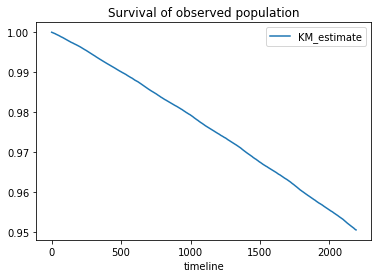

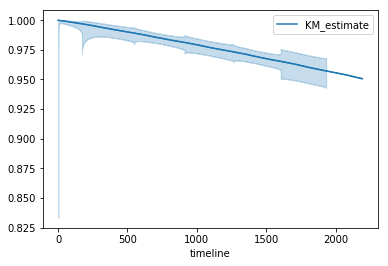

In [12]:
# Creating KMF model for 6b data 
kmf1 = KaplanMeierFitter()
kmf1.fit(D1, event_observed=O1)
kmf1.survival_function_.plot()
plt.title('Survival of observed population')
kmf1.plot()

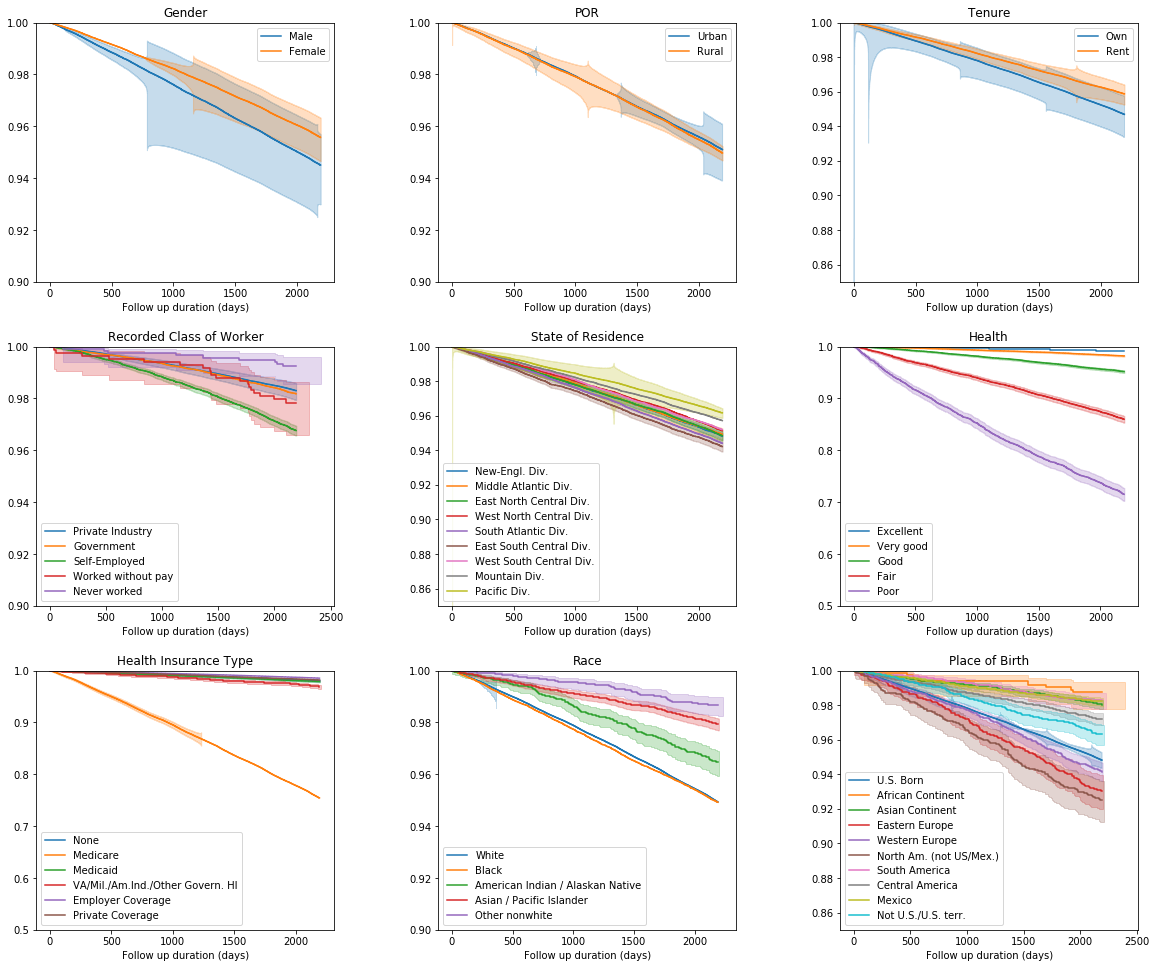

In [13]:
# Arranging all plots together to facilitate visual comparison of 11 year data with 6b data
# Plotting survival probability by Gender
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(331)
sex = (dataset1["sex"] == 1)
kmf1.fit(D1[sex], event_observed=O1[sex], label="Male")
kmf1.plot(ax=ax, ci_force_lines=False)
kmf1.fit(D1[~sex], event_observed=O1[~sex], label="Female")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("Gender")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Urban vs Rural POR
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(332)
POR = (dataset1["urban"] == 1)
kmf1.fit(D1[POR], event_observed=O1[POR], label="Urban")
kmf1.plot(ax=ax, ci_force_lines=False)
kmf1.fit(D1[~POR], event_observed=O1[~POR], label="Rural")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("POR")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Tenure
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(333)
ten = (dataset1["tenure"] == 1)
kmf1.fit(D1[ten], event_observed=O1[ten], label="Own")
kmf1.plot(ax=ax, ci_force_lines=False)
kmf1.fit(D1[~ten], event_observed=O1[~ten], label="Rent")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1);
plt.title("Tenure")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by RCOW
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(334)
rcow = (dataset1["rcow"] == 1)
kmf1.fit(D1[rcow], event_observed=O1[rcow], label="Private Industry")
kmf1.plot(ax=ax, ci_force_lines=False)
rcow2 = (dataset1["rcow"] == 2)
kmf1.fit(D1[rcow2], event_observed=O1[rcow2], label="Government")
kmf1.plot(ax=ax, ci_force_lines=False)
rcow3 = (dataset1["rcow"] == 3)
kmf1.fit(D1[rcow3], event_observed=O1[rcow3], label="Self-Employed")
kmf1.plot(ax=ax, ci_force_lines=False)
rcow4 = (dataset1["rcow"] == 4)
kmf1.fit(D1[rcow4], event_observed=O1[rcow4], label="Worked without pay")
kmf1.plot(ax=ax, ci_force_lines=False)
rcow5 = (dataset1["rcow"] == 5)
kmf1.fit(D1[rcow5], event_observed=O1[rcow5], label="Never worked")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("Recorded Class of Worker")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by StateR
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(335)
ned=[11,12,13,14,15,16]
mad=[21,22,23]
encd=[31,32,33,34,35]
wncd=[41,42,43,44,45,46,47]
sad=[51,52,53,54,55,56,57,58,59]
escd=[61,62,63,64]
wscd=[71,72,73,74]
md=[81,82,83,84,85,86,87,88]
pd=[91,92,93,94,95]
state1 = (dataset1["stater"].isin (ned))
kmf1.fit(D1[state1], event_observed=O1[state1], label="New-Engl. Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state2 = (dataset1["stater"].isin (mad))
kmf1.fit(D1[state2], event_observed=O1[state2], label="Middle Atlantic Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state3 = (dataset1["stater"].isin (encd))
kmf1.fit(D1[state3], event_observed=O1[state3], label="East North Central Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state4 = (dataset1["stater"].isin (wncd))
kmf1.fit(D1[state4], event_observed=O1[state4], label="West North Central Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state5 = (dataset1["stater"].isin (sad))
kmf1.fit(D1[state5], event_observed=O1[state5], label="South Atlantic Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state6 = (dataset1["stater"].isin (escd))
kmf1.fit(D1[state6], event_observed=O1[state6], label="East South Central Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state7 = (dataset1["stater"].isin (wscd))
kmf1.fit(D1[state7], event_observed=O1[state7], label="West South Central Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state8 = (dataset1["stater"].isin (md))
kmf1.fit(D1[state8], event_observed=O1[state8], label="Mountain Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
state9 = (dataset1["stater"].isin (pd))
kmf1.fit(D1[state9], event_observed=O1[state9], label="Pacific Div.")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1);
plt.title("State of Residence")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Health
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(336)
health1 = (dataset1["health"]==1)
kmf1.fit(D1[health1], event_observed=O1[health1], label="Excellent")
kmf1.plot(ax=ax, ci_force_lines=False)
health2 = (dataset1["health"]==2)
kmf1.fit(D1[health2], event_observed=O1[health2], label="Very good")
kmf1.plot(ax=ax, ci_force_lines=False)
health3 = (dataset1["health"]==3)
kmf1.fit(D1[health3], event_observed=O1[health3], label="Good")
kmf1.plot(ax=ax, ci_force_lines=False)
health4 = (dataset1["health"]==4)
kmf1.fit(D1[health4], event_observed=O1[health4], label="Fair")
kmf1.plot(ax=ax, ci_force_lines=False)
health5 = (dataset1["health"]==5)
kmf1.fit(D1[health5], event_observed=O1[health5], label="Poor")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.5, 1);
plt.title("Health")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Health Insurance Type
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(337)
hitype = (dataset1["hitype"]==0)
kmf1.fit(D1[hitype], event_observed=O1[hitype], label="None")
kmf1.plot(ax=ax, ci_force_lines=False)
hitype1 = (dataset1["hitype"]==1)
kmf1.fit(D1[hitype1], event_observed=O1[hitype1], label="Medicare")
kmf1.plot(ax=ax, ci_force_lines=False)
hitype2 = (dataset1["hitype"]==2)
kmf1.fit(D1[hitype2], event_observed=O1[hitype2], label="Medicaid")
kmf1.plot(ax=ax, ci_force_lines=False)
hitype3 = (dataset1["hitype"]==3)
kmf1.fit(D1[hitype3], event_observed=O1[hitype3], label="VA/Mil./Am.Ind./Other Govern. HI")
kmf1.plot(ax=ax, ci_force_lines=False)
hitype4 = (dataset1["hitype"]==4)
kmf1.fit(D1[hitype4], event_observed=O1[hitype4], label="Employer Coverage")
kmf1.plot(ax=ax, ci_force_lines=False)
hitype5 = (dataset1["hitype"]==5)
kmf1.fit(D1[hitype5], event_observed=O1[hitype5], label="Private Coverage")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.5, 1);
plt.title("Health Insurance Type")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Race
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(338)
race1 = (dataset1["race"]==1)
kmf1.fit(D1[race1], event_observed=O1[race1], label="White")
kmf1.plot(ax=ax, ci_force_lines=False)
race2 = (dataset1["race"]==2)
kmf1.fit(D1[race2], event_observed=O1[race2], label="Black")
kmf1.plot(ax=ax, ci_force_lines=False)
race3 = (dataset1["race"]==3)
kmf1.fit(D1[race3], event_observed=O1[race3], label="American Indian / Alaskan Native")
kmf1.plot(ax=ax, ci_force_lines=False)
race4 = (dataset1["race"]==4)
kmf1.fit(D1[race4], event_observed=O1[race4], label="Asian / Pacific Islander")
kmf1.plot(ax=ax, ci_force_lines=False)
race5 = (dataset1["race"]==5)
kmf1.fit(D1[race5], event_observed=O1[race5], label="Other nonwhite")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1)
plt.title("Race")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by POB
fig = plt.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(339)
us=[901,902,904,905, 906, 908, 909,910,911,912,913,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,944,945,946,947,948,949,950,951,953,954,955,956,957,958, 959,960]
pob1 = (dataset1["pob"].isin(us))
kmf1.fit(D1[pob1], event_observed=O1[pob1], label="U.S. Born")
kmf1.plot(ax=ax, ci_force_lines=False)
pob2 = (dataset1["pob"]==101)
kmf1.fit(D1[pob2], event_observed=O1[pob2], label="African Continent")
kmf1.plot(ax=ax, ci_force_lines=False)
pob3 = (dataset1["pob"]==102)
kmf1.fit(D1[pob3], event_observed=O1[pob3], label="Asian Continent")
kmf1.plot(ax=ax, ci_force_lines=False)
pob4 = (dataset1["pob"]==103)
kmf1.fit(D1[pob4], event_observed=O1[pob4], label="Eastern Europe")
kmf1.plot(ax=ax, ci_force_lines=False)
pob5 = (dataset1["pob"]==104)
kmf1.fit(D1[pob5], event_observed=O1[pob5], label="Western Europe")
kmf1.plot(ax=ax, ci_force_lines=False)
pob6 = (dataset1["pob"]==105)
kmf1.fit(D1[pob6], event_observed=O1[pob6], label="North Am. (not US/Mex.)")
kmf1.plot(ax=ax, ci_force_lines=False)
pob7 = (dataset1["pob"]==106)
kmf1.fit(D1[pob7], event_observed=O1[pob7], label="South America")
kmf1.plot(ax=ax, ci_force_lines=False)
pob8 = (dataset1["pob"]==107)
kmf1.fit(D1[pob8], event_observed=O1[pob8], label="Central America")
kmf1.plot(ax=ax, ci_force_lines=False)
pob9 = (dataset1["pob"]==108)
kmf1.fit(D1[pob9], event_observed=O1[pob9], label="Mexico")
kmf1.plot(ax=ax, ci_force_lines=False)
pob10 = (dataset1["pob"]==111)
kmf1.fit(D1[pob10], event_observed=O1[pob10], label="Not U.S./U.S. terr.")
kmf1.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1)
plt.title("Place of Birth")
plt.xlabel("Follow up duration (days)")

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

In [20]:
# Doing the same in plotly for 6b dataset
# Plotting survival probability by Gender
fig = plt.gcf()
#fig.set_size_inches(18,15)
ax = plt.subplot(331)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sex = (dataset1["sex"] == 1)
kmf1.fit(D1[sex], event_observed=O1[sex], label="Male")
kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
kmf1.fit(D1[~sex], event_observed=O1[~sex], label="Female")
p = kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
plt.ylim(0.5, 1);
#plt.title("Gender")
plt.xlabel("Follow up duration (days)")

tls.set_credentials_file(username='yg7891', api_key='cjs1S61VN1STTLYXnhz7')
a = plt.gcf()

def pyplot(a, ci=True, legend=True, filename='Gender_Interactive'):
    # Convert mpl fig obj to plotly fig obj, resize to plotly's default
    py_fig = tls.mpl_to_plotly(a, resize=True)
   
    if legend == True:
        # Add legend, place it at the top right corner of the plot
        py_fig['layout'].update(
            showlegend=True,
            title='Gender',
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'),
            width=900,
            height=600,
            legend=layout.Legend(
                x=1.05,
                y=1
            )
        )
        
    # Send updated figure object to Plotly, show result in notebook
    return py.iplot(py_fig, filename=filename)

pyplot(a)

In [21]:
# Doing the same in pyplot for 6b dataset
# Plotting survival probability by Health Insurance Type
fig = plt.gcf()
#fig.set_size_inches(18,15)
ax = plt.subplot(337)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
hitype = (dataset1["hitype"]==0)
kmf1.fit(D1[hitype], event_observed=O1[hitype], label="None")
kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
hitype1 = (dataset1["hitype"]==1)
kmf1.fit(D1[hitype1], event_observed=O1[hitype1], label="Medicare")
kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
hitype2 = (dataset1["hitype"]==2)
kmf1.fit(D1[hitype2], event_observed=O1[hitype2], label="Medicaid")
kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
hitype3 = (dataset1["hitype"]==3)
kmf1.fit(D1[hitype3], event_observed=O1[hitype3], label="VA/Mil./Am.Ind./Other Govern. HI")
kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
hitype4 = (dataset1["hitype"]==4)
kmf1.fit(D1[hitype4], event_observed=O1[hitype4], label="Employer Coverage")
kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
hitype5 = (dataset1["hitype"]==5)
kmf1.fit(D1[hitype5], event_observed=O1[hitype5], label="Private Coverage")
kmf1.plot(ax=ax, ci_force_lines=True, legend=False)
plt.ylim(0.5, 1);
#plt.title("Health Insurance Type")
plt.xlabel("Follow up duration (days)")

tls.set_credentials_file(username='yg7891', api_key='cjs1S61VN1STTLYXnhz7')
b = plt.gcf()

def pyplot(b, ci=False, legend=True, filename='HealthInsurance_Interactive'):
    # Convert mpl fig obj to plotly fig obj, resize to plotly's default
    py_fig = tls.mpl_to_plotly(b, resize=True)
   
    if legend == True:
        # Add legend, place it at the top right corner of the plot
        py_fig['layout'].update(
            showlegend=True,
            title='Health Insurance',
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'),
            width=900,
            height=600,
            legend=layout.Legend(
                x=1.01,
                y=1
            )
        )
        
    # Send updated figure object to Plotly, show result in notebook
    return py.iplot(py_fig, filename=filename)

pyplot(b)

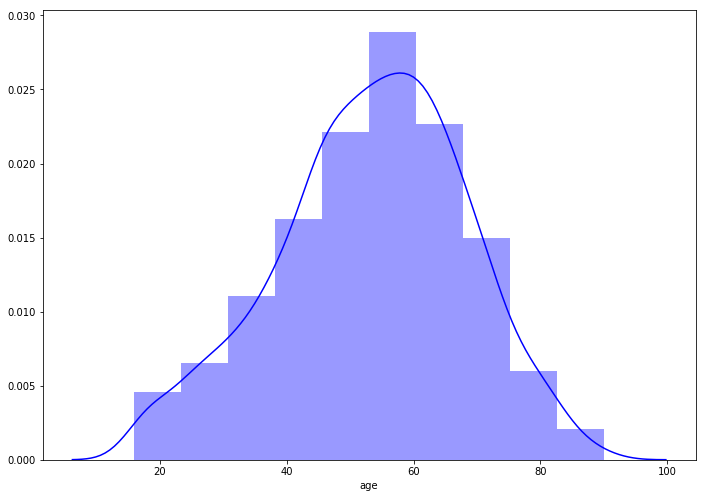

In [243]:
# Plotting data by Age
y = dataset_newna.loc[:,'age']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
age = sns.distplot(y, bins=10, color='b', ax=ax)

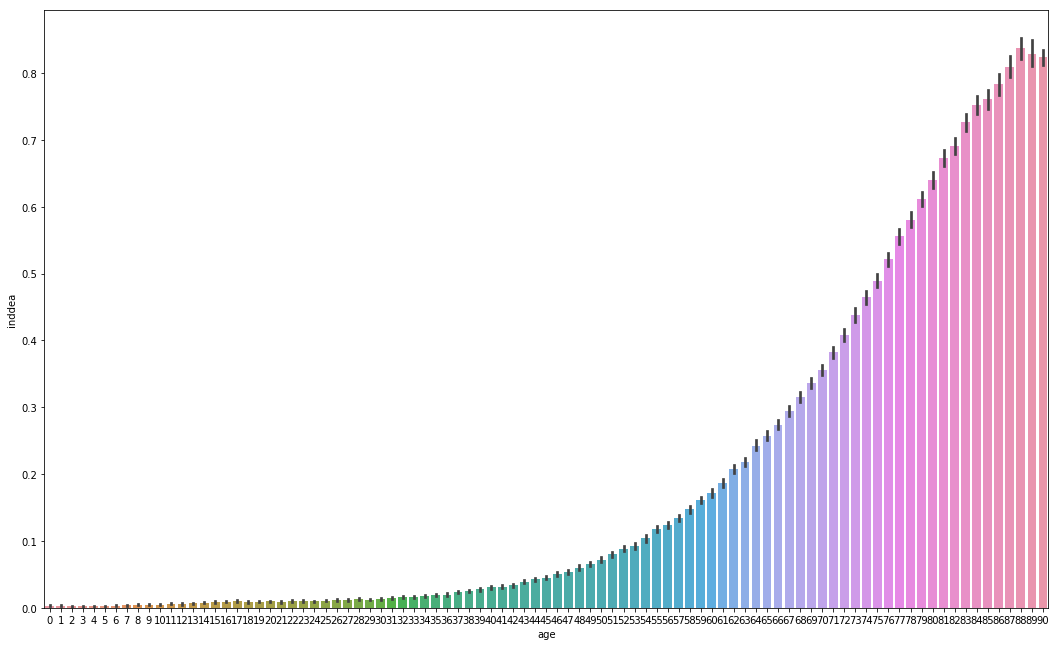

In [249]:
plt.figure(figsize=(18, 11))
age1 = sns.barplot(x='age', y='inddea', data=dataset)

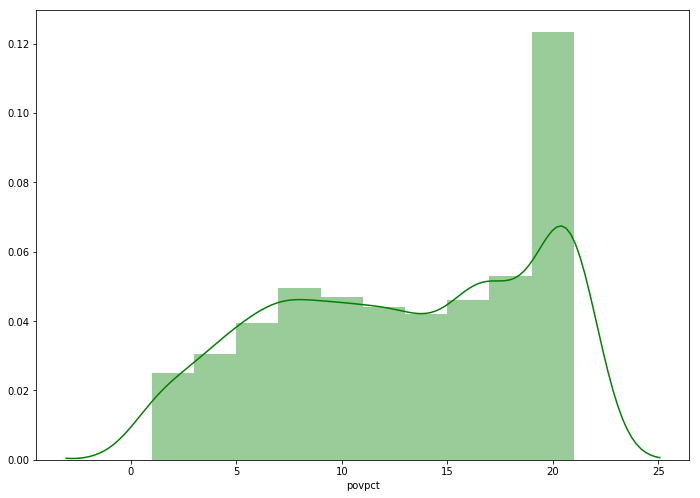

In [252]:
# Plotting data by Income
y_inc = dataset_newna.loc[:, 'povpct']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
age = sns.distplot(y_inc, bins=10, color='g', ax=ax)

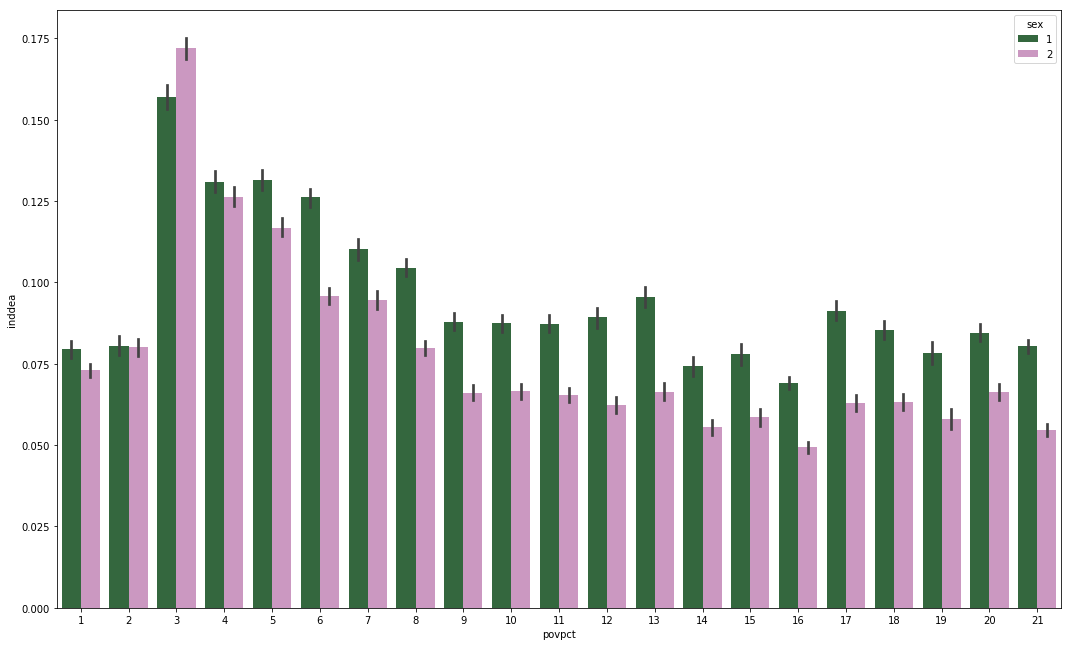

In [254]:
plt.figure(figsize=(18, 11))
inc = sns.barplot(x='povpct', y='inddea', hue='sex', palette='cubehelix', n_boot=1000, data=dataset)

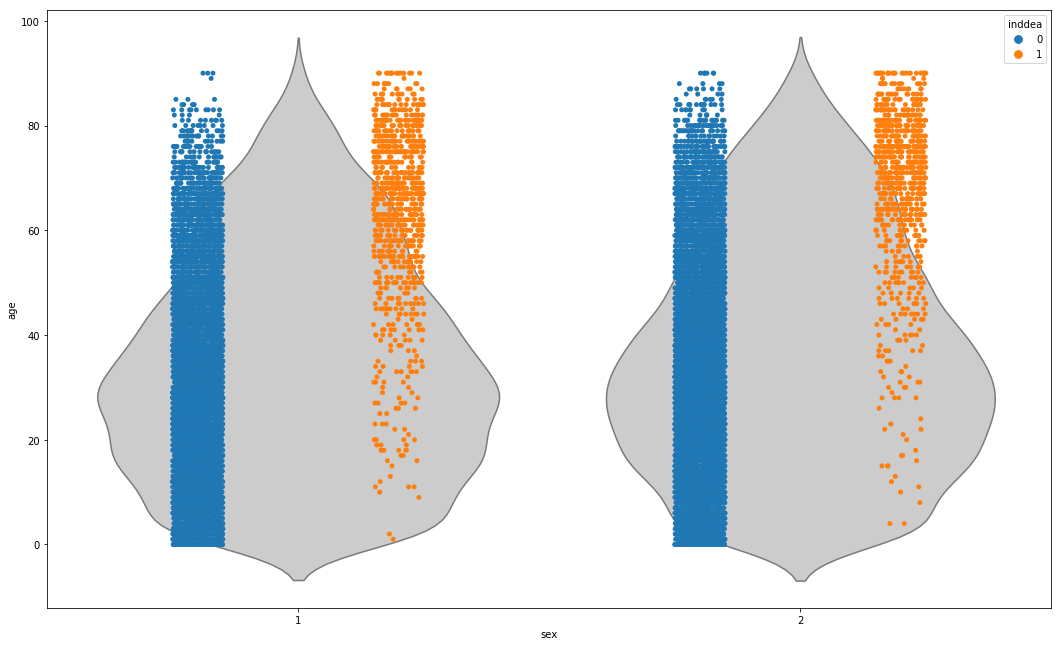

In [286]:
plt.figure(figsize=(18, 11))
inc_1 = sns.violinplot(x="sex", y="age", data=dataset_subset, inner=None, color=".8")
inc_1 = sns.stripplot(x='sex', y='age', hue='inddea', data=dataset_subset, jitter=1, dodge=True)

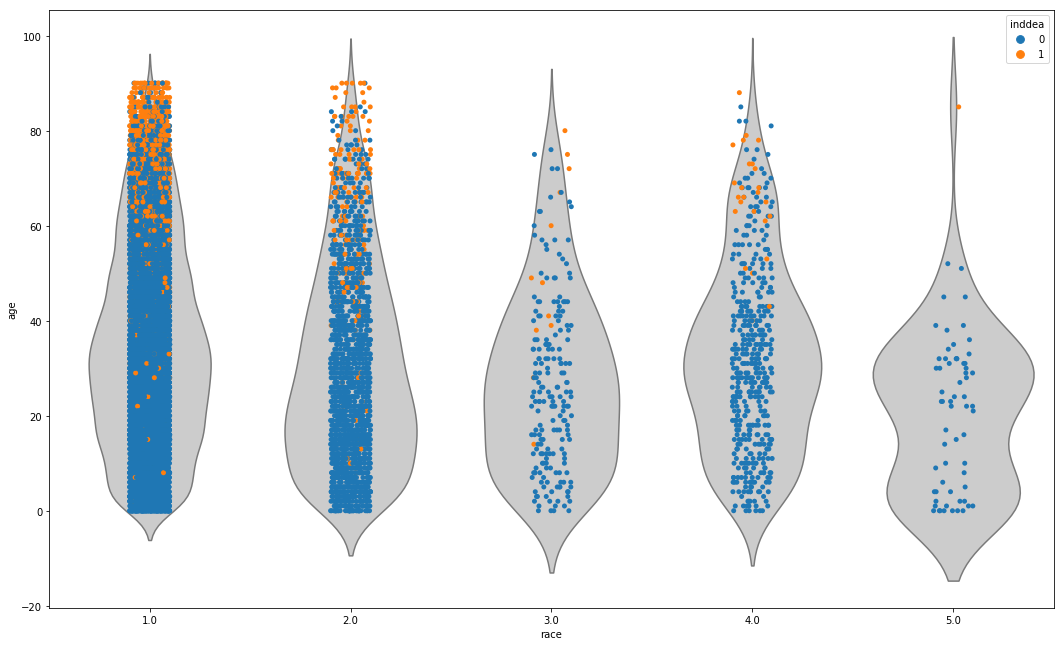

In [66]:
# Plotting data by Race
plt.figure(figsize=(18, 11))
race = sns.violinplot(x="race", y="age", data=dataset_subset, inner=None, color=".8")
race = sns.stripplot(x='race', y='age', hue='inddea', data=dataset_subset, jitter=True)

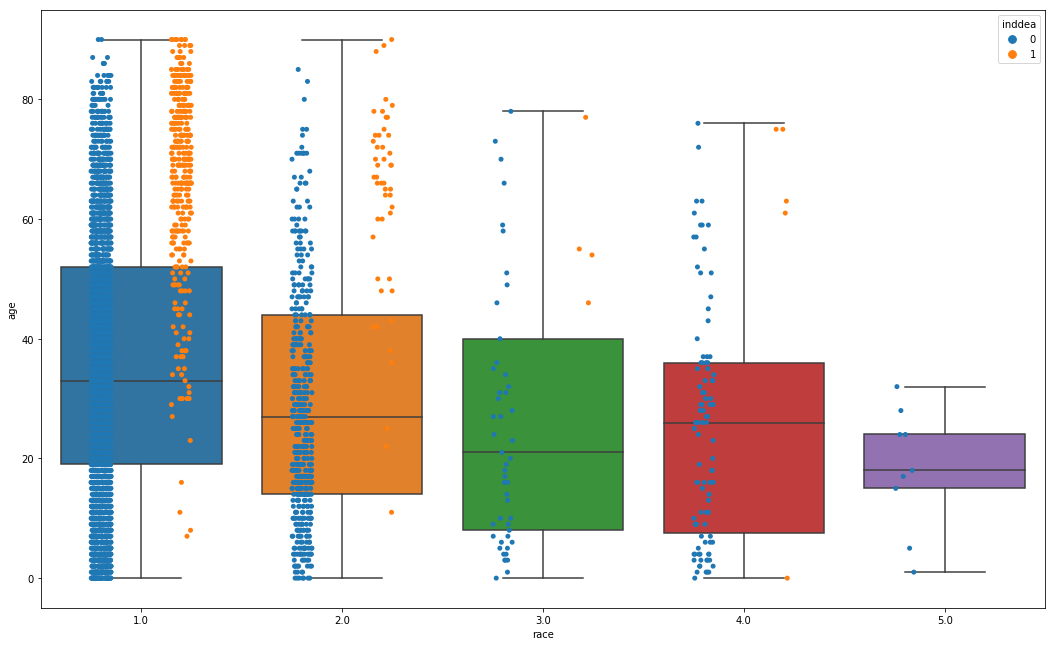

In [63]:
plt.figure(figsize=(18, 11))
race1 = sns.boxplot(x="race", y="age", data=dataset_subset, whis=np.inf)
race1 = sns.stripplot(x='race', y='age', hue='inddea', data=dataset, jitter=True, dodge=True)

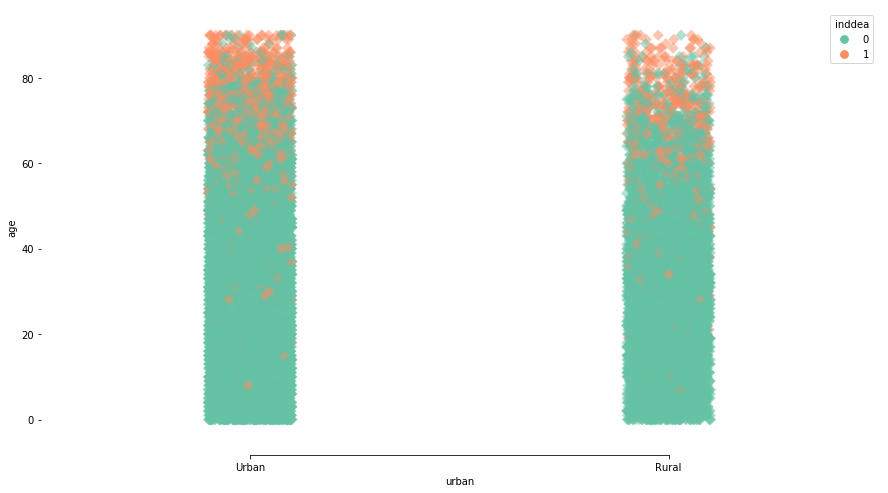

In [174]:
plt.figure(figsize=(15, 8))
race3 =  sns.stripplot(x="urban", y="age", hue="inddea", data=dataset_subset, palette="Set2", size=8, marker="D", jitter=True, edgecolor="gray", alpha=.5)
race3.set_xticklabels(["Urban", "Rural"])
sns.despine(offset=10, trim=True, left=True)

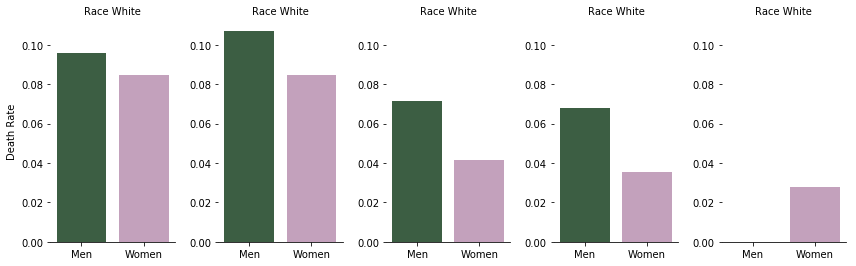

In [138]:
rs = sns.factorplot(x="sex", y="inddea", col="race", data=dataset_subset, saturation=.5, kind="bar", palette='cubehelix', ci=None, aspect=.6)
(rs.set_axis_labels("", "Death Rate")
 .set_titles("Race White")
 .set_xticklabels(["Men", "Women"])
 .despine(left=True))

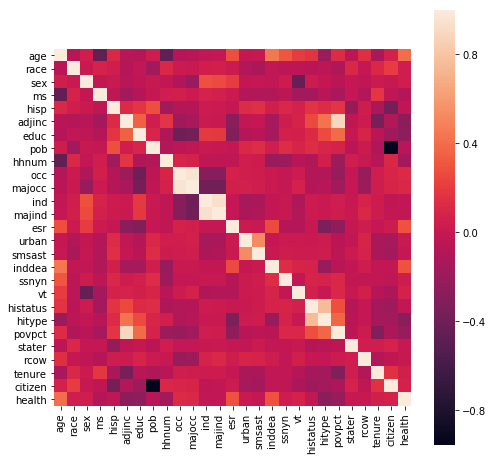

In [150]:
corr = dataset.iloc[:, [1,2,3,4,5,6,7,8,11,13,14,15,16,17,18,19,20,26,27,28,29,30,31,32,33,34,35]].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=1, square=True)

In [154]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
cor_dict = corr['inddea'].to_dict()
del cor_dict['inddea']
pp.pprint("List the numerical features decendingly by their correlation with IndDea:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    pp.pprint("{0}: {1}".format(*ele))

'List the numerical features decendingly by their correlation with IndDea:\n'
'age: 0.4428533812703282'
'health: 0.296311178456567'
'esr: 0.2605435815799682'
'hhnum: -0.21416663983952278'
'hitype: -0.21401733125636838'
'educ: -0.15416104832126556'
'adjinc: -0.1490051369350987'
'ssnyn: 0.13280428342009526'
'ms: -0.0991972543922228'
'vt: 0.08958568437122438'
'histatus: 0.07583007101513946'
'hisp: 0.05827891337943874'
'povpct: -0.05753582430760992'
'pob: 0.04744397428862922'
'rcow: 0.03483234836645549'
'tenure: -0.02891109652950403'
'sex: -0.027744675858773864'
'race: -0.027579272972894375'
'citizen: -0.027459521055683507'
'stater: -0.026306364204457554'
'ind: -0.020767055886199343'
'majind: -0.018358976264224464'
'majocc: 0.013668863940373545'
'occ: 0.009102214177910435'
'smsast: 0.007758532420118921'
'urban: -0.0019339858418438527'


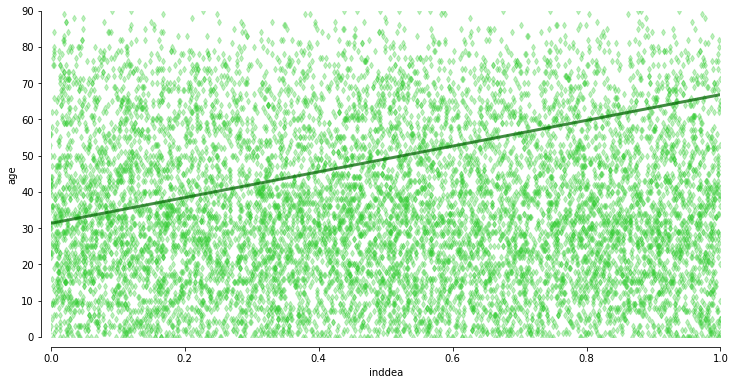

In [191]:
# Plot data and a linear regression model fit against Age variable with a 68% confidence interval, which corresponds with the standard error of the estimate:
l = sns.regplot(x = 'inddea', y = 'age', data = dataset_subset, ci=68, robust=True, x_jitter=1.0, marker="d", scatter_kws={"color":"limegreen", "alpha":0.3, "s":20}, line_kws={"color": "darkgreen", "alpha":0.7, "lw":3})
l.figure.set_size_inches(12, 6)
l.set(xlim=(0, 1))
l.set(ylim=(0, 90))
sns.despine(offset=10, trim=True)

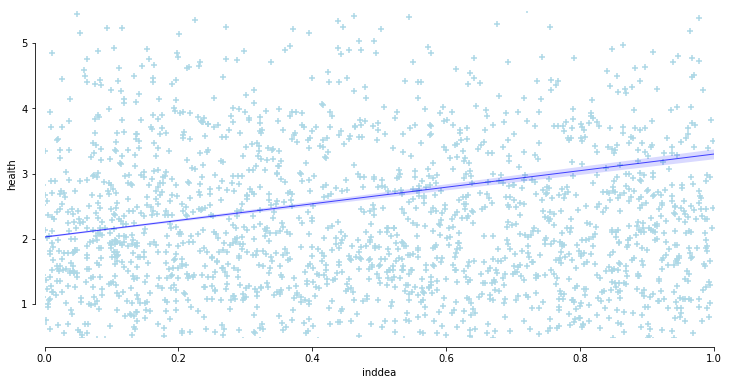

In [189]:
# Plot data and a linear regression model fit against Health variable
l = sns.regplot(x = 'inddea', y = 'health', data = dataset_subset, ci=68, robust=True, y_jitter=1.0, x_jitter=1.0, marker="+", scatter_kws={"color":"lightblue", "alpha":1.0, "s":30}, line_kws={"color": "blue", "alpha":0.7, "lw":1})
l.figure.set_size_inches(12, 6)
l.set(xlim=(0, 1))
l.set(ylim=(0.5, 5.5))
sns.despine(offset=10, trim=True)

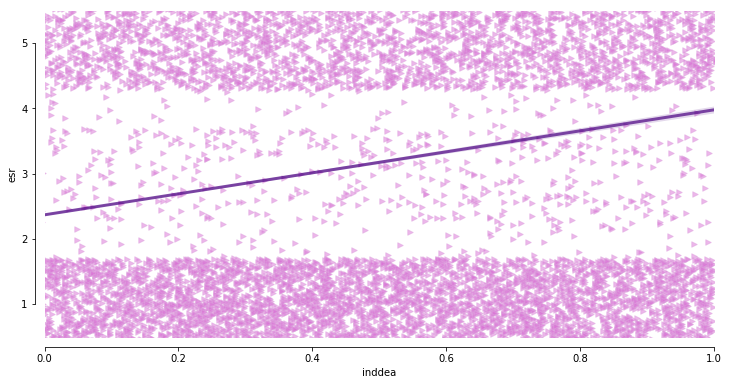

In [201]:
# Plot data and a linear regression model fit against Employment variable
l = sns.regplot(x = 'inddea', y = 'esr', data = dataset_subset, ci=68, robust=True, y_jitter=0.7, x_jitter=1.0, marker=">", scatter_kws={"color": "orchid", "edgecolor":"plum", "alpha":0.5, "s":30}, line_kws={"color": "indigo", "alpha":0.7, "lw":3})
l.figure.set_size_inches(12, 6)
l.set(xlim=(0, 1))
l.set(ylim=(0.5, 5.5))
sns.despine(offset=10, trim=True)

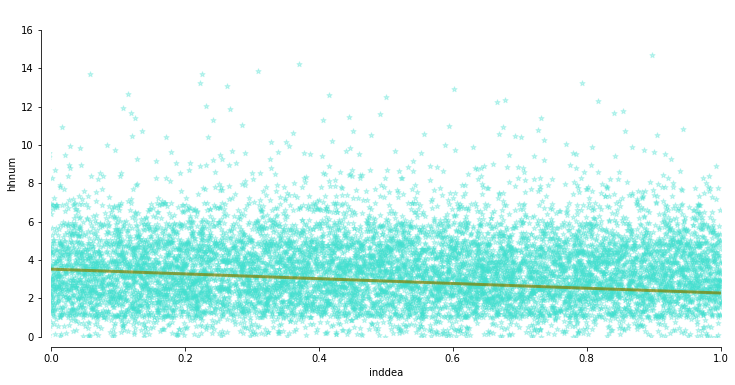

In [205]:
# Plot data and a linear regression model fit against # of people in the household (HhNum) variable
l = sns.regplot(x = 'inddea', y = 'hhnum', data = dataset_subset, ci=68, robust=True, y_jitter=1.0, x_jitter=1.0, marker="*", scatter_kws={"color": "turquoise", "alpha":0.3, "s":30}, line_kws={"color": "olive", "alpha":0.7, "lw":3})
l.figure.set_size_inches(12, 6)
l.set(xlim=(0, 1))
l.set(ylim=(0, 17))
sns.despine(offset=10, trim=True)

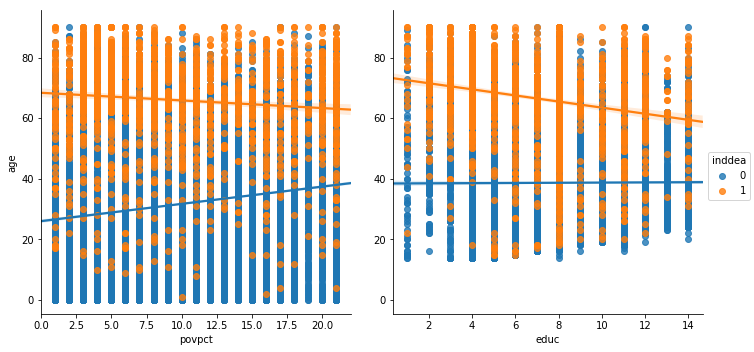

In [285]:
# Plot data and a linear regression model fit against PovPct variable
l = sns.pairplot(x_vars = ['povpct', 'educ'], y_vars = ['age'], hue = 'inddea', data = dataset_subset, kind='reg', size=5)
#l.figure.set_size_inches(12, 6)
#l.set(xlim=(0, 1))
#l.set(ylim=(0, 23))
#sns.despine(offset=10, trim=True)

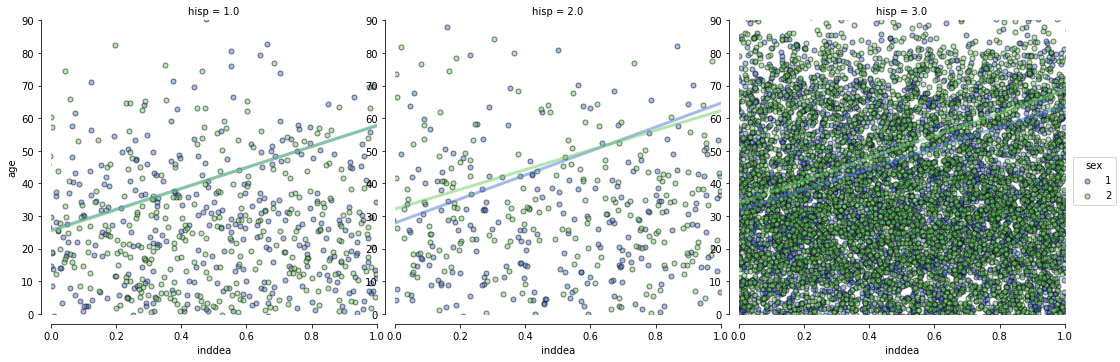

In [266]:
# Plotting Inddea against Age and Hispanic origin and Gender
g = sns.lmplot(x="inddea", y="age",ci=None, data=dataset_subset, col="hisp", size=5, palette="muted", col_wrap=3, scatter_kws={"s": 25,"edgecolor":"black","alpha":.5}, line_kws={"lw":3, "alpha":1.0},hue="sex",x_jitter=1.0,y_jitter=1.0)
g.set(xlim=(0, 1))
g.set(ylim=(0, 90))
sns.despine(offset=10, trim=True)

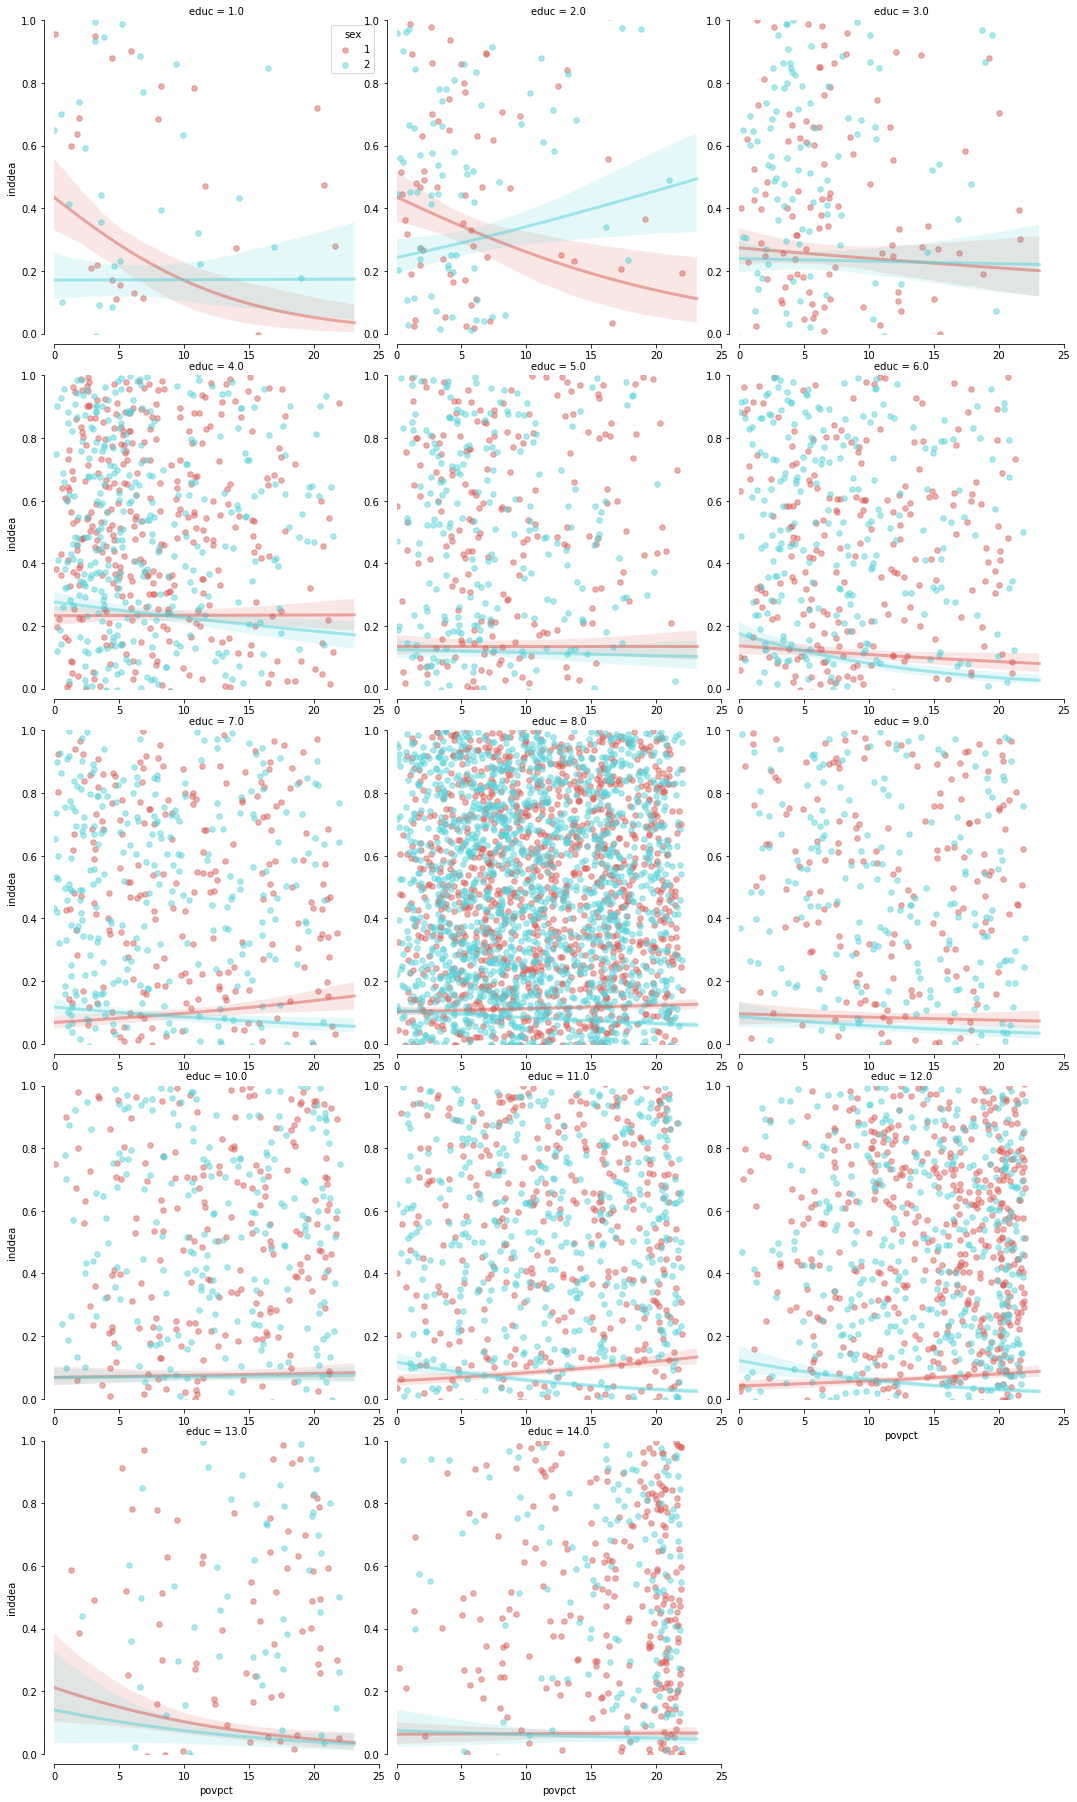

In [268]:
# Plotting Inddea against PovPct and Education and Gender
dataset_subset_new = dataset_subset.dropna()
g = sns.lmplot(x="povpct", y="inddea",ci=68, data=dataset_subset, col="educ", logistic=True, size=5, palette="hls", col_wrap=3, sharex=True, sharey=True,legend_out=False,scatter_kws={"s": 30,"alpha":.5}, line_kws={"lw":3,"alpha":0.5},hue="sex",x_jitter=1.0,y_jitter=1.0)
g.set(xlim=(0, 25))
g.set(ylim=(0, 1))
sns.despine(offset=10, trim=True)

In [1]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [13]:
# Change CSV to TSV
import csv

with open('11_Updated_Data.csv','r') as csvin, open('11_Updated.txt', 'w') as tsvout:
    csvin = csv.reader(csvin)
    tsvout = csv.writer(tsvout, delimiter='\t')

    for row in csvin:
        tsvout.writerow(row)

In [14]:
net.load_file('11_Updated.txt')

C:\Users\Yara\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
import ipywidgets as widgets

In [20]:
net.filter_N_top('row', 2500, 'var')
net.enrichrgram('GO_Biological_Process_2015')
net.cluster()
net.widget()

A Jupyter Widget